                                        Dating V1.01


Dating can be difficult during this day and age. Especially with online dating - how can you enable yourself to compete with others or to stand above others? From extensive research and data accumulated from a Professor from Columbia Business School, we will examine the dataset and narrow down by gender and what they are looking for their potential partner. Keep in mind, the dataset is not generalized enough to include the entire population - the data is well intended for college students or age groups between 20 and some early 30s. Outside the scope or range identified will not be valid.

First, let's get a breif background of the datasets. The data is collected from speed dating which includes many different characteristics, attributes, and also opinions. In more details, the data consist of participant's basic background such as age and gender to questionaire before and after the speed dating, also basic questions of what participants are looking for in their potential partners. There are 195 different categories of information! We will only focus on specific information - specifically what these approximately 8,000 participants thoughts and opinions in a potential partner.

Let's dive in a have a look at the data!

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Download data set from here:
#https://www.kaggle.com/annavictoria/speed-dating-experiment

data = pd.read_csv('Speed Dating Data.csv', engine='python')
#data = pd.read_csv('/content/Speed Dating Data.csv', engine = 'python')


In [3]:
print(data.head())
print(data.info())

   iid   id  gender  idg  condtn  wave  round  position  positin1  order  ...  \
0    1  1.0       0    1       1     1     10         7       NaN      4  ...   
1    1  1.0       0    1       1     1     10         7       NaN      3  ...   
2    1  1.0       0    1       1     1     10         7       NaN     10  ...   
3    1  1.0       0    1       1     1     10         7       NaN      5  ...   
4    1  1.0       0    1       1     1     10         7       NaN      7  ...   

   attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  intel5_3  \
0      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
1      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
2      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
3      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
4      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   

   fun5_3  amb5_3  
0     NaN     NaN  
1     NaN 

As we can see here examining the dataset - there are many columns and information. Links to the dataset can be found here:

https://www.kaggle.com/annavictoria/speed-dating-experiment

This also contains information and explanation on the layout of the columns.
We would like to explore and test that

Males tend to look more for attractiveness versus females in a relationship - among the age group between 20 and 30 who are college students

Now, as mentioned before, we will only examine certain parts of the data - so let's filter only the columns we need.

In [4]:
Filter = data[['gender', 'age', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']]
print(Filter.head())
print(Filter.info())

   gender   age  attr1_1  sinc1_1  intel1_1  fun1_1  amb1_1  shar1_1
0       0  21.0     15.0     20.0      20.0    15.0    15.0     15.0
1       0  21.0     15.0     20.0      20.0    15.0    15.0     15.0
2       0  21.0     15.0     20.0      20.0    15.0    15.0     15.0
3       0  21.0     15.0     20.0      20.0    15.0    15.0     15.0
4       0  21.0     15.0     20.0      20.0    15.0    15.0     15.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 8 columns):
gender      8378 non-null int64
age         8283 non-null float64
attr1_1     8299 non-null float64
sinc1_1     8299 non-null float64
intel1_1    8299 non-null float64
fun1_1      8289 non-null float64
amb1_1      8279 non-null float64
shar1_1     8257 non-null float64
dtypes: float64(7), int64(1)
memory usage: 523.7 KB
None


Breaking down the dataset we are left with the basic background of age and gender. We will examine 6 particular qualities/traits respectively follows:

Attractive
Sincere
Intelligent
Fun
Ambitious
Shared Interests

Each participants in the data set are given 100 points to allocate to the 6 qualities from above - the more the points allocated for a category, the more important that category is for that participant. Also true, the least the points allocated to a category, the least the importance of that category for that partipant.

We will break this data further now by gender.

In [5]:
#Before we seperate the data into males vs femalse, let's make sure the data provided is also correct.
#I have incorporated another column to add up all the values of the attributes to make sure that we see all
#the values appropriately adds up to 100

pd.set_option('mode.chained_assignment', None) #turn off warning on operation assignment below
temp = Filter['attr1_1'] + Filter['sinc1_1'] + Filter['intel1_1'] + Filter['fun1_1'] + Filter['amb1_1'] + Filter['shar1_1']
Filter['Check'] = temp


In [6]:
Male = Filter[Filter['gender'] == 1]
Female = Filter[Filter['gender'] == 0]
print('\nMALE\n')
print(Male.head())
print(Male.info())
print('\n')
print('\nFEMALE\n')
print(Female.head())
print(Female.info())


MALE

     gender   age  attr1_1  sinc1_1  intel1_1  fun1_1  amb1_1  shar1_1  Check
100       1  27.0     35.0     20.0      20.0    20.0     0.0      5.0  100.0
101       1  27.0     35.0     20.0      20.0    20.0     0.0      5.0  100.0
102       1  27.0     35.0     20.0      20.0    20.0     0.0      5.0  100.0
103       1  27.0     35.0     20.0      20.0    20.0     0.0      5.0  100.0
104       1  27.0     35.0     20.0      20.0    20.0     0.0      5.0  100.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4194 entries, 100 to 8377
Data columns (total 9 columns):
gender      4194 non-null int64
age         4164 non-null float64
attr1_1     4174 non-null float64
sinc1_1     4174 non-null float64
intel1_1    4174 non-null float64
fun1_1      4164 non-null float64
amb1_1      4154 non-null float64
shar1_1     4154 non-null float64
Check       4154 non-null float64
dtypes: float64(8), int64(1)
memory usage: 327.7 KB
None



FEMALE

   gender   age  attr1_1  sinc1_1  intel1_1  

As we can see here - there are more males than females in the dataset, how is this possible? Good question, the participants are shuffled in the speed dating experiment. Also for simplicity, let's assume the data set presumes participants are looking for the opposite sex to date.

Review the data further - check for any invalid values in the data set.

In [7]:
filter_male = Male.isna()
col = filter_male.columns
for i in col:
    print(filter_male[i].value_counts())
    #Male = Male.loc[filter_male[i]]

False    4194
Name: gender, dtype: int64
False    4164
True       30
Name: age, dtype: int64
False    4174
True       20
Name: attr1_1, dtype: int64
False    4174
True       20
Name: sinc1_1, dtype: int64
False    4174
True       20
Name: intel1_1, dtype: int64
False    4164
True       30
Name: fun1_1, dtype: int64
False    4154
True       40
Name: amb1_1, dtype: int64
False    4154
True       40
Name: shar1_1, dtype: int64
False    4154
True       40
Name: Check, dtype: int64


In [8]:
filter_female = Female.isna()
col = filter_female.columns
for i in col:
    print(filter_female[i].value_counts())
    #Female = Female.loc[filter_female[i]]

False    4184
Name: gender, dtype: int64
False    4119
True       65
Name: age, dtype: int64
False    4125
True       59
Name: attr1_1, dtype: int64
False    4125
True       59
Name: sinc1_1, dtype: int64
False    4125
True       59
Name: intel1_1, dtype: int64
False    4125
True       59
Name: fun1_1, dtype: int64
False    4125
True       59
Name: amb1_1, dtype: int64
False    4103
True       81
Name: shar1_1, dtype: int64
False    4103
True       81
Name: Check, dtype: int64


There are some invalid characters entered into the data set - such as 'decimal points' or non integers. For simplicity, we will ignore those entries, because in both males and females dropping those rows in insignificant to the sample size we already have available. This will not compromise the information as the sample size is large enough to draw conclusions/run tests.

In [9]:
Male.dropna(inplace = True)
Female.dropna(inplace = True)
print('\nMALE\n')
print(Male.head())
print(Male.info())
print('\n')
print('\nFEMALE\n')
print(Female.head())
print(Female.info())


MALE

     gender   age  attr1_1  sinc1_1  intel1_1  fun1_1  amb1_1  shar1_1  Check
100       1  27.0     35.0     20.0      20.0    20.0     0.0      5.0  100.0
101       1  27.0     35.0     20.0      20.0    20.0     0.0      5.0  100.0
102       1  27.0     35.0     20.0      20.0    20.0     0.0      5.0  100.0
103       1  27.0     35.0     20.0      20.0    20.0     0.0      5.0  100.0
104       1  27.0     35.0     20.0      20.0    20.0     0.0      5.0  100.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4154 entries, 100 to 8377
Data columns (total 9 columns):
gender      4154 non-null int64
age         4154 non-null float64
attr1_1     4154 non-null float64
sinc1_1     4154 non-null float64
intel1_1    4154 non-null float64
fun1_1      4154 non-null float64
amb1_1      4154 non-null float64
shar1_1     4154 non-null float64
Check       4154 non-null float64
dtypes: float64(8), int64(1)
memory usage: 324.5 KB
None



FEMALE

   gender   age  attr1_1  sinc1_1  intel1_1  

Now let's visualize the data!
Here we will examine closely and compare the different attributes between male versus female by using a boxplot

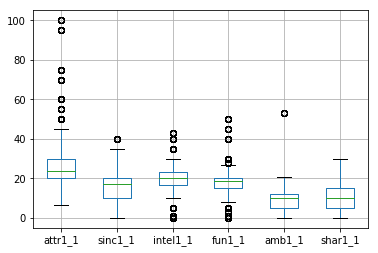

In [10]:
Male.boxplot(column = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1'])

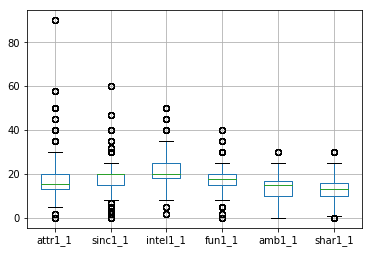

In [11]:
Female.boxplot(column = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1'])

From the boxplots above we can see a lot of outliers along withthe density of the particular characteristics chosen between Males and Females. The Male population appears to allocate a lot of points towards attractiveness.


Let's conduct some tests to see correlations. Here are more visual represenations also information of the skewness and kurtosis of the data.


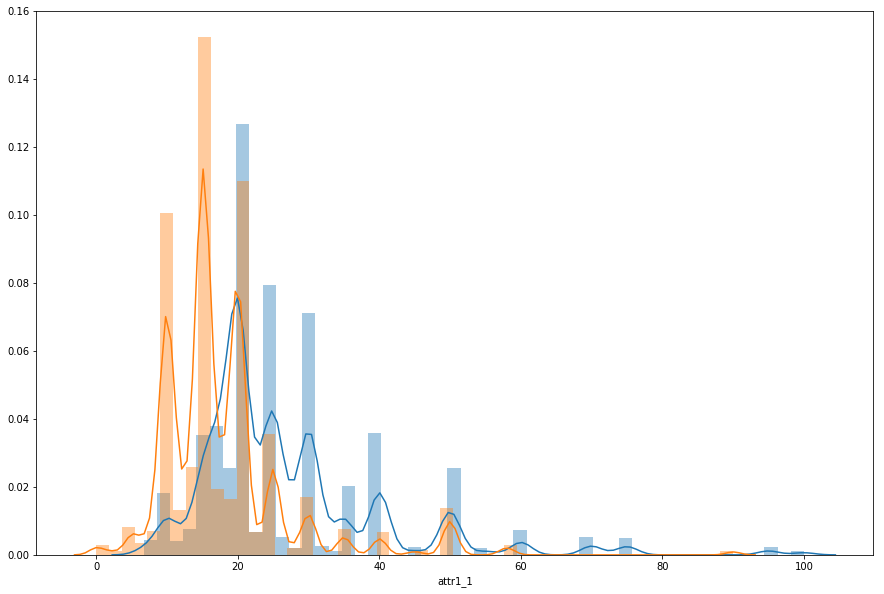

In [12]:
plt.figure(figsize = (15,10))
sns.distplot(Male['attr1_1'])
sns.distplot(Female['attr1_1'])

Here we will trim the data set a little to get rid of some of the outliers and make our data more normally distributed in order to get better results. The outliers are ok to get rid of because our sample size are still large enough to conduct the appropriate tests. 

The following eliminates some of the males and females in the data set to get closer to a more normally distributed data set.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4088 entries, 100 to 8377
Data columns (total 9 columns):
gender      4088 non-null int64
age         4088 non-null float64
attr1_1     4088 non-null float64
sinc1_1     4088 non-null float64
intel1_1    4088 non-null float64
fun1_1      4088 non-null float64
amb1_1      4088 non-null float64
shar1_1     4088 non-null float64
Check       4088 non-null float64
dtypes: float64(8), int64(1)
memory usage: 319.4 KB
None
DescribeResult(nobs=4088, minmax=(6.67, 70.0), mean=25.83442514677104, variance=127.32646803256542, skewness=1.403821008754973, kurtosis=2.2364114945912323)


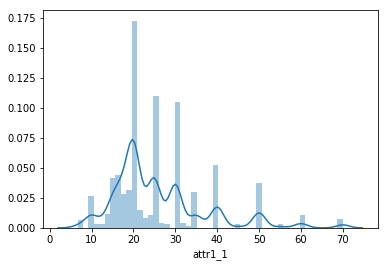

In [13]:
#filters the males
_Male = Male[Male['attr1_1']<75]
print(_Male.info())
print(stats.describe(_Male['attr1_1']))
sns.distplot(_Male['attr1_1'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3948 entries, 0 to 7893
Data columns (total 9 columns):
gender      3948 non-null int64
age         3948 non-null float64
attr1_1     3948 non-null float64
sinc1_1     3948 non-null float64
intel1_1    3948 non-null float64
fun1_1      3948 non-null float64
amb1_1      3948 non-null float64
shar1_1     3948 non-null float64
Check       3948 non-null float64
dtypes: float64(8), int64(1)
memory usage: 308.4 KB
None
DescribeResult(nobs=3948, minmax=(0.0, 45.0), mean=16.710182370820664, variance=42.65370799814872, skewness=1.0510600490915178, kurtosis=2.2680235907910493)


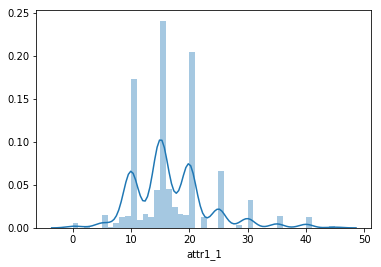

In [14]:
#filter the females
_Female = Female[Female['attr1_1']<50]
print(_Female.info())
print(stats.describe(_Female['attr1_1']))
sns.distplot(_Female['attr1_1'])

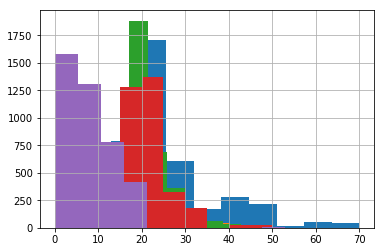

In [15]:
for i in _Male.columns[2:7]:
    _Male[i].hist()


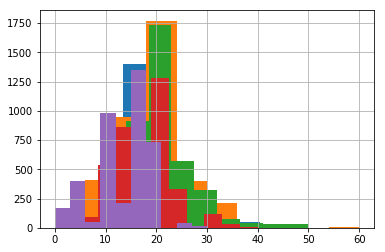

In [16]:
for i in _Female.columns[2:7]:
    _Female[i].hist()

Now let's examine the skewness and kurtosis again - a good rule of thumb is to to get as close to 0 as possible for the skewneess and kurtosis, so if they're between -3 and 3, the data should be good to conduct tests with.

In [17]:
stats.describe(_Male['attr1_1'])

DescribeResult(nobs=4088, minmax=(6.67, 70.0), mean=25.83442514677104, variance=127.32646803256542, skewness=1.403821008754973, kurtosis=2.2364114945912323)

In [18]:
stats.describe(_Female['attr1_1'])

DescribeResult(nobs=3948, minmax=(0.0, 45.0), mean=16.710182370820664, variance=42.65370799814872, skewness=1.0510600490915178, kurtosis=2.2680235907910493)

Let's run the tests!

In [19]:
stats.mannwhitneyu(_Male['attr1_1'], _Female['attr1_1'])

MannwhitneyuResult(statistic=3523366.0, pvalue=0.0)

In [20]:
stats.kruskal(_Male['attr1_1'], _Female['attr1_1'])

KruskalResult(statistic=1936.7750942469384, pvalue=0.0)

In [21]:
stats.kruskal(_Male['attr1_1'], _Female['attr1_1'])

KruskalResult(statistic=1936.7750942469384, pvalue=0.0)

As we can see the p value is very low - we can reject the null hypothesis. There is significant evidence to say that we accept the alternative hypothesis and reject the null hypothesis. In other words, there is signficant evidence to say that males overall tend to seek attractiveness in a partner versus females who are less likely than males to seek attractiveness.

Reexamining the data - in the Boxplot which compares all the attributes to each other by Gender, males tend to look for attractiveness for their potentail partners versus the other characteristics. Females tend to almost have an overall balanced or even out distribution of points (on average) to the different characteristics, but intelligence appears to make it's way more on top of the other characteristics.